<a href="https://colab.research.google.com/github/SunnyDahitJ/ML-programs/blob/main/lab_8(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv("Crop_recommendation.csv")
df 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


      N   P   K  temperature   humidity        ph    rainfall
0    90  42  43    20.879744  82.002744  6.502985  202.935536
1    85  58  41    21.770462  80.319644  7.038096  226.655537
2    60  55  44    23.004459  82.320763  7.840207  263.964248
3    74  35  40    26.491096  80.158363  6.980401  242.864034
4    78  42  42    20.130175  81.604873  7.628473  262.717340
..   ..  ..  ..          ...        ...       ...         ...
395  27  65  18    20.109938  23.223238  5.595032   73.363865
396  30  63  16    23.605066  21.905396  5.525905  100.597873
397  37  70  25    19.731369  24.894874  5.819404   84.063541
398  27  63  19    20.934099  21.189301  5.562202  133.191442
399  22  60  24    18.782263  20.247683  5.630665  104.257072

[400 rows x 7 columns]
0             rice
1             rice
2             rice
3             rice
4             rice
          ...     
395    kidneybeans
396    kidneybeans
397    kidneybeans
398    kidneybeans
399    kidneybeans
Name: label, Length: 40

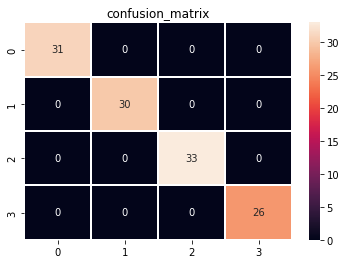

1.0


In [16]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df=df[:400]

x = df.drop("label", axis = 1)

y = df["label"]
print(x)
print(y)


from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= .30, shuffle= True)

C = 1.0
model = SVC(kernel= "linear", C = C)

train  = model.fit(X_train, y_train)

# print(train)

y_pred = model.predict(X_test)

# print(y_pred)



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

c_matrix = confusion_matrix(y_pred, y_test)
print(c_matrix)

heat = sns.heatmap(data= c_matrix, linewidth = 1,annot=True)
plt.title("confusion_matrix")
plt.show()


print(accuracy_score(y_pred, y_test))

Prediction using Polynomial method : 1.0
Classificatio is as follows 

               precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        33
        rice       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



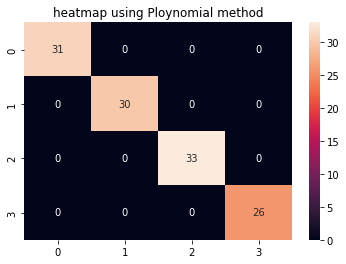

In [17]:
model2 = SVC(kernel="poly",degree=3, C=C)
model2.fit(X_train, y_train)

p_pred = model2.predict(X_test)

print(f"Prediction using Polynomial method : {accuracy_score(p_pred, y_test)}")

print(f"Classificatio is as follows \n\n {classification_report(p_pred,y_test)}")

p_cmatrix= confusion_matrix(p_pred, y_test)

p_heat = sns.heatmap(data = p_cmatrix, annot = True)
plt.title("heatmap using Ploynomial method")
plt.show()


Prediction using RBF method : 1.0
Classificatio is as follows 

               precision    recall  f1-score   support

    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        33
        rice       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



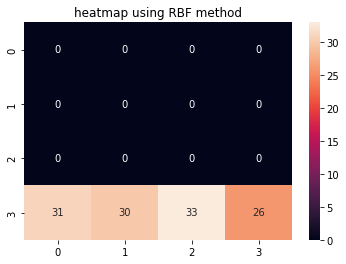

In [18]:
model3 = SVC(kernel="rbf",gamma=0.8, C=C)
model3.fit(X_train, y_train)

r_pred = model3.predict(X_test)

print(f"Prediction using RBF method : {accuracy_score(p_pred, y_test)}")

print(f"Classificatio is as follows \n\n {classification_report(p_pred,y_test)}")

r_cmatrix= confusion_matrix(r_pred, y_test)

r_heat = sns.heatmap(data = r_cmatrix, annot = True)
plt.title("heatmap using RBF method")
plt.show()
